Taxi-v3 problem using Q-Learning, Deep Q-Learning, Sarse and Policy Gradient

Q-learning:

Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-0.mp4
Episode 0, Total Reward: -830
Episode 100, Total Reward: -251
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-200.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-200.mp4



Moviepy - Done !


Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-200.mp4
Episode 200, Total Reward: 10
Episode 300, Total Reward: -12
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-400.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-400.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-400.mp4
Episode 400, Total Reward: 9
Episode 500, Total Reward: 11
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-600.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-600.mp4



Moviepy - Done !


Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-600.mp4
Episode 600, Total Reward: 6
Episode 700, Total Reward: 9
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-800.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-800.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-800.mp4


Episode 800, Total Reward: 10
Episode 900, Total Reward: 8
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1000.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1000.mp4
Episode 1000, Total Reward: 6
Episode 1100, Total Reward: 10
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1200.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1200.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1200.mp4
Episode 1200, Total Reward: 2
Episode 1300, Total Reward: 9
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1400.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1400.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1400.mp4
Episode 1400, Total Reward: 4
Episode 1500, Total Reward: 10
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1600.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1600.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1600.mp4
Episode 1600, Total Reward: 3
Episode 1700, Total Reward: 9
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1800.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1800.mp4



Moviepy - Done !


Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-1800.mp4
Episode 1800, Total Reward: 9
Episode 1900, Total Reward: 15
Average reward: 6.91
Average length: 13.64
Average success rate: 96.7%


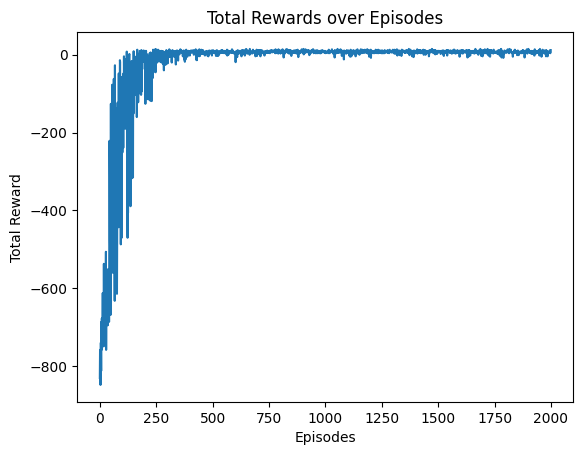

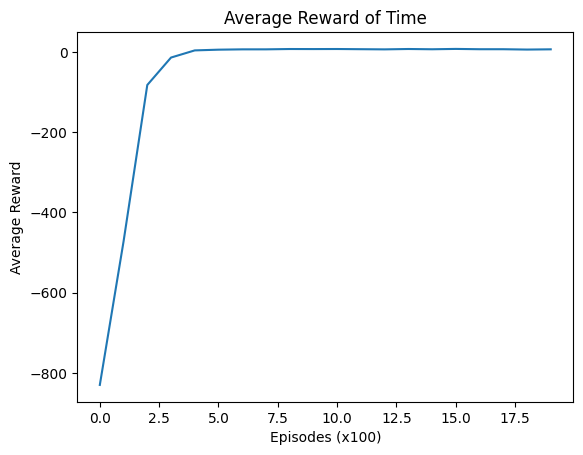

Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-2000.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Q-Learning\rl-video-episode-2000.mp4


In [15]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.wrappers import RecordVideo


# Initialize environment
env = gym.make('Taxi-v3', render_mode="rgb_array") # , render_mode="human"
env.action_space.seed(42)

# Initialize metrics
average_rewards = []
episode_lengths = []
success_rates = []
rewards = []

# Records a video every 200 episodes
env = RecordVideo(env, video_folder='prob4/3.prob4_output/Q-Learning', episode_trigger=lambda episode_id: episode_id % 200 == 0)

# Hyperparameters
alpha = 0.9 # Learning rate
gamma = 0.99 # Discount factor
epsilon = 1 # Initial exploration rate
epsilon_min = 0.01 # Minimal exploration rate after decay
epsilon_decay = 0.99 # Decay rate
episodes = 2000 # Amount of episodes

# Q-table initialization
n_states = env.observation_space.n # Retrieves the total number of possible states
n_actions = env.action_space.n # Retrieves the total number of possible actions
q_table = np.zeros((n_states, n_actions))

# Training loop
for episode in range(episodes):
    observation, info = env.reset() # Make sure environment is reset before every run

    # Initializing variables
    total_reward = 0
    steps = 0
    success = 0
    done = False

    # Looping through the episodes
    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample() # Selects a random action from the possible actions
        else:
            action = np.argmax(q_table[observation]) # Selects the best possible action based on the q-table

        next_observation, reward, terminated, truncated, info = env.step(action)

        # Updating the Q-table (state is observation)
        best_next_action = np.max(q_table[next_observation])
        q_table[observation, action] = q_table[observation, action] + \
            alpha * (reward + gamma * best_next_action - q_table[observation, action])
        
        # Update state
        observation = next_observation

        # For metrics
        steps += 1 
        total_reward += reward

        done = terminated or truncated

        if terminated:
            success = 1

    # Controlling the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Tracking metrics
    rewards.append(total_reward)
    episode_lengths.append(steps)
    success_rates.append(success)
    avg_success_rate = np.mean(success_rates) * 100

    if episode % 100 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_length = np.mean(episode_lengths[-100:])

        average_rewards.append(avg_reward)
        print(f'Episode {episode}, Total Reward: {total_reward}')
        
print(f'Average reward: {avg_reward}')
print(f'Average length: {avg_length}')
print(f'Average success rate: {avg_success_rate}%')
        
# Plotting the total reward
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()

# Plotting the average reward
plt.plot(average_rewards)
plt.xlabel('Episodes (x100)')
plt.ylabel('Average Reward')
plt.title('Average Reward of Time')
plt.show()

env.close()

Random Policy

Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-0.mp4
Episode 0, Average Reward (last 100): -794.0, Average Success Rate: 0.0%
Episode 100, Average Reward (last 100): -768.74, Average Success Rate: 2.9702970297029703%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-200.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-200.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-200.mp4
Episode 200, Average Reward (last 100): -778.86, Average Success Rate: 3.482587064676617%
Episode 300, Average Reward (last 100): -788.48, Average Success Rate: 2.6578073089700998%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-400.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-400.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-400.mp4
Episode 400, Average Reward (last 100): -755.71, Average Success Rate: 3.99002493765586%
Episode 500, Average Reward (last 100): -783.37, Average Success Rate: 3.992015968063872%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-600.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-600.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-600.mp4
Episode 600, Average Reward (last 100): -776.54, Average Success Rate: 4.159733777038269%
Episode 700, Average Reward (last 100): -780.97, Average Success Rate: 3.9942938659058487%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-800.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-800.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-800.mp4
Episode 800, Average Reward (last 100): -757.19, Average Success Rate: 4.369538077403246%
Episode 900, Average Reward (last 100): -773.73, Average Success Rate: 4.328523862375139%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1000.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1000.mp4
Episode 1000, Average Reward (last 100): -768.65, Average Success Rate: 4.395604395604396%
Episode 1100, Average Reward (last 100): -778.0, Average Success Rate: 4.268846503178928%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1200.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1200.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1200.mp4
Episode 1200, Average Reward (last 100): -770.36, Average Success Rate: 4.163197335553705%
Episode 1300, Average Reward (last 100): -786.96, Average Success Rate: 3.920061491160646%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1400.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1400.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1400.mp4
Episode 1400, Average Reward (last 100): -742.83, Average Success Rate: 4.282655246252676%
Episode 1500, Average Reward (last 100): -787.97, Average Success Rate: 4.197201865423051%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1600.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1600.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1600.mp4
Episode 1600, Average Reward (last 100): -780.74, Average Success Rate: 4.2473454091193%
Episode 1700, Average Reward (last 100): -785.56, Average Success Rate: 4.174015285126396%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1800.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1800.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-1800.mp4
Episode 1800, Average Reward (last 100): -780.01, Average Success Rate: 4.2754025541365905%
Episode 1900, Average Reward (last 100): -760.29, Average Success Rate: 4.260915307732772%
Average reward: -760.29
Average length: 196.2
Average success rate: 4.5%


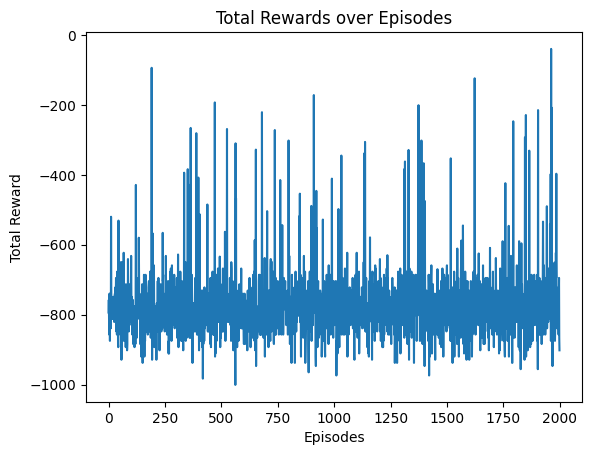

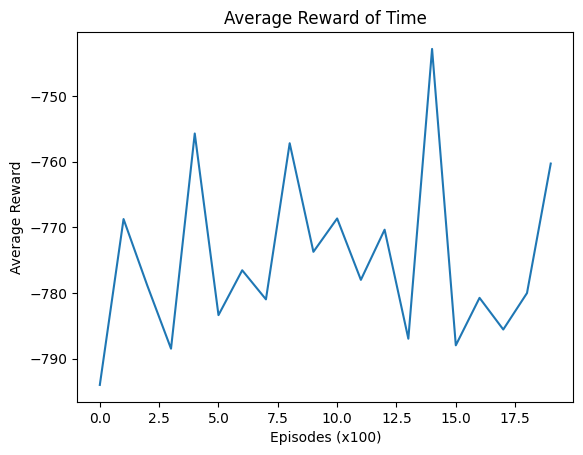

Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-2000.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Random_Policy\rl-video-episode-2000.mp4


In [16]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.wrappers import RecordVideo

# Initialize environment
env = gym.make('Taxi-v3', render_mode="rgb_array") # , render_mode="human"
env.action_space.seed(42)

# Initialize metrics
average_rewards = []
episode_lengths = []
success_rates = []
rewards = []

# Records a video every 200 episodes
env = RecordVideo(env, video_folder='prob4/3.prob4_output/Random_Policy', episode_trigger=lambda episode_id: episode_id % 200 == 0)

# Hyperparameters
episodes = 2000 # Amount of episodes

# Training loop
for episode in range(episodes):
    observation, info = env.reset() # Make sure environment is reset before every run

    # Initializing variables
    total_reward = 0
    steps = 0
    success = 0
    done = False

     # Looping through the episodes
    while not done:
        action = env.action_space.sample() # Selects a random action from the possible actions
        next_observation, reward, terminated, truncated, info = env.step(action)

        # For metrics
        steps += 1 
        total_reward += reward
        if terminated:
            success = 1
        done = terminated or truncated

    # Tracking metrics
    rewards.append(total_reward)
    episode_lengths.append(steps)
    success_rates.append(success)
    avg_success_rate = np.mean(success_rates) * 100

    if episode % 100 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_length = np.mean(episode_lengths[-100:])

        average_rewards.append(avg_reward)
        print(f'Episode {episode}, Average Reward (last 100): {avg_reward}, Average Success Rate: {avg_success_rate}%')
        
print(f'Average reward: {avg_reward}')
print(f'Average length: {avg_length}')
print(f'Average success rate: {avg_success_rate}%')
        
# Plotting the total reward
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()

# Plotting the average reward
plt.plot(average_rewards)
plt.xlabel('Episodes (x100)')
plt.ylabel('Average Reward')
plt.title('Average Reward of Time')
plt.show()

env.close()

Heuristic-Policy

Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-0.mp4
Episode 0, Average Reward (last 100): -200.0, Average Success Rate: 0.0%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-1.mp4
Episode 1, Average Reward (last 100): -200.0, Average Success Rate: 0.0%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-2.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-2.mp4
Episode 2, Average Reward (last 100): -200.0, Average Success Rate: 0.0%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-3.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-3.mp4
Episode 3, Average Reward (last 100): -184.75, Average Success Rate: 25.0%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-4.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-4.mp4
Episode 4, Average Reward (last 100): -187.8, Average Success Rate: 20.0%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-5.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-5.mp4
Episode 5, Average Reward (last 100): -162.5, Average Success Rate: 33.33333333333333%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-6.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-6.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-6.mp4
Episode 6, Average Reward (last 100): -167.85714285714286, Average Success Rate: 28.57142857142857%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-7.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-7.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-7.mp4
Episode 7, Average Reward (last 100): -171.875, Average Success Rate: 25.0%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-8.mp4
Episode 8, Average Reward (last 100): -175.0, Average Success Rate: 22.22222222222222%
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-9.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Heuristic_Policy\rl-video-episode-9.mp4
Episode 9, Average Reward (last 100): -177.5, Average Success Rate: 20.0%
Average reward: -177.5
Average length: 181.7
Average success rate: 20.0%


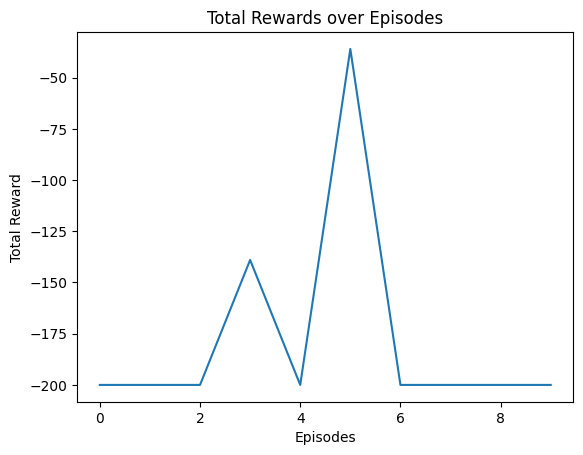

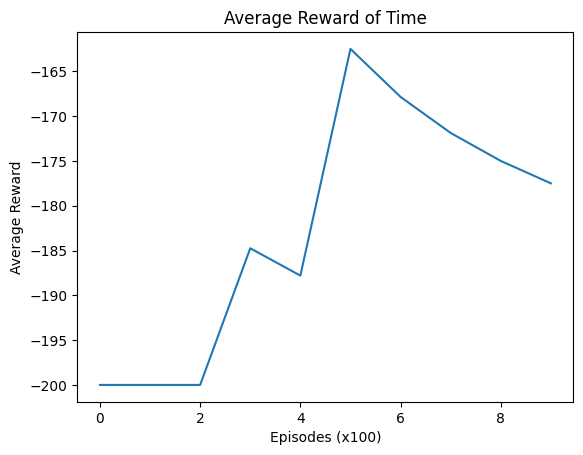

In [17]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from gym.wrappers import RecordVideo

# Initialize environment
env = gym.make('Taxi-v3', render_mode="rgb_array") # , render_mode="human"
env.action_space.seed(42)

# Initialize metrics
average_rewards = []
episode_lengths = []
success_rates = []
rewards = []
memory = {}



# Records a video every 200 episodes
env = RecordVideo(env, video_folder='prob4/3.prob4_output/Heuristic_Policy', episode_trigger=lambda episode_id: episode_id % 1 == 0)

# Hyperparameters
episodes = 10 # Amount of episodes
rand_steps_if_stuck = 5
rand_steps_counter = 0

def heuristic_policy(observation, memory):
    global rand_steps_counter
    taxi_row, taxi_col, passenger_location, destination = env.unwrapped.decode(observation)

    # Locate both passenger and destination
    locations = [(0,0), (0,4), (4,0), (4,3)]

   
    if rand_steps_counter > 0:
        rand_steps_counter -= 1
        action = random.randint(0,3)
        return action

    # Determine the target based on whether passenger is in the taxi
    if passenger_location == 4:  # Passenger is in the taxi
        target_row, target_col = locations[destination]
    else:
        target_row, target_col = locations[passenger_location]

    if taxi_col == target_col and taxi_row == target_row:
        if passenger_location == 4:
            action = 5
        else:
            action = 4
    
    # Check if we're repeating states to prevent getting stuck
    current_state = (taxi_row, taxi_col, passenger_location)
    # print(f'Current state: {current_state}')
    # print(f'Memory: {memory}')
    if memory.get("last_state") == current_state:
        rand_steps_counter = rand_steps_if_stuck
        action = random.randint(0, 3)
        return action
    # Update memory with current state
    memory["last_state"] = current_state

    # Choose the primary movement direction towards the target
    if taxi_row < target_row:
        action = 0  # Move down
    elif taxi_row > target_row:
        action = 1  # Move up
    elif taxi_col < target_col:
        action = 2  # Move right
    elif taxi_col > target_col:
        action = 3  # Move left

    return action

# Training loop
for episode in range(episodes):
    observation, info = env.reset() # Make sure environment is reset before every run
    memory["last_state"] = None

    # Initializing variables
    total_reward = 0
    steps = 0
    success = 0
    done = False

     # Looping through the episodes
    while not done:
        action = heuristic_policy(observation, memory) # Choose the action based on the heuristic policy
        next_observation, reward, terminated, truncated, info = env.step(action)

        # For metrics
        steps += 1 
        total_reward += reward
        if terminated:
            success = 1
        done = terminated or truncated

        # Update state
        observation = next_observation

    # Tracking metrics
    rewards.append(total_reward)
    episode_lengths.append(steps)
    success_rates.append(success)
    avg_success_rate = np.mean(success_rates) * 100

    if episode % 1 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_length = np.mean(episode_lengths[-100:])
        
        average_rewards.append(avg_reward)
        print(f'Episode {episode}, Average Reward (last 100): {avg_reward}, Average Success Rate: {avg_success_rate}%')
        
print(f'Average reward: {avg_reward}')
print(f'Average length: {avg_length}')
print(f'Average success rate: {avg_success_rate}%')
        
# Plotting the total reward
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()

# Plotting the average reward
plt.plot(average_rewards)
plt.xlabel('Episodes (x100)')
plt.ylabel('Average Reward')
plt.title('Average Reward of Time')
plt.show()

env.close()

Double Deep Q-learning

c:\Users\jonas\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-0.mp4
Episode 0, Total Reward: -758
Episode 100, Total Reward: -398
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-200.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-200.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-200.mp4
Episode 200, Total Reward: 8


Episode 300, Total Reward: 9
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-400.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-400.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-400.mp4
Episode 400, Total Reward: 8


Episode 500, Total Reward: 9
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-600.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-600.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-600.mp4
Episode 600, Total Reward: 6


Episode 700, Total Reward: 11
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-800.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-800.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-800.mp4
Episode 800, Total Reward: 9


Episode 900, Total Reward: 8
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1000.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1000.mp4
Episode 1000, Total Reward: 4


Episode 1100, Total Reward: 7
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1200.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1200.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1200.mp4
Episode 1200, Total Reward: 8


Episode 1300, Total Reward: 10
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1400.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1400.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1400.mp4
Episode 1400, Total Reward: 6


Episode 1500, Total Reward: 9
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1600.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1600.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1600.mp4
Episode 1600, Total Reward: 7


Episode 1700, Total Reward: 10
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1800.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1800.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-1800.mp4
Episode 1800, Total Reward: 11


Episode 1900, Total Reward: 8
Average reward: 6.87
Average length: 13.68
Average success rate: 90.10000000000001%


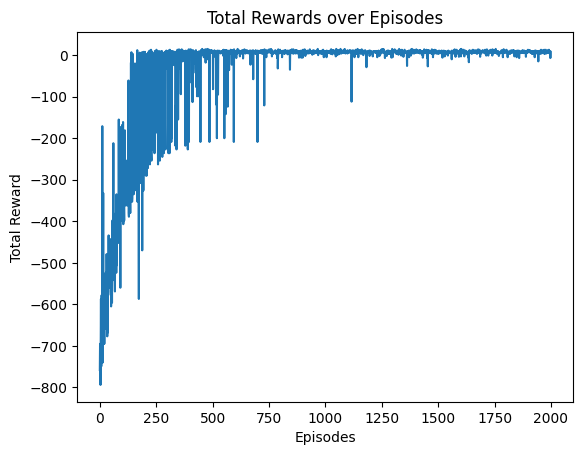

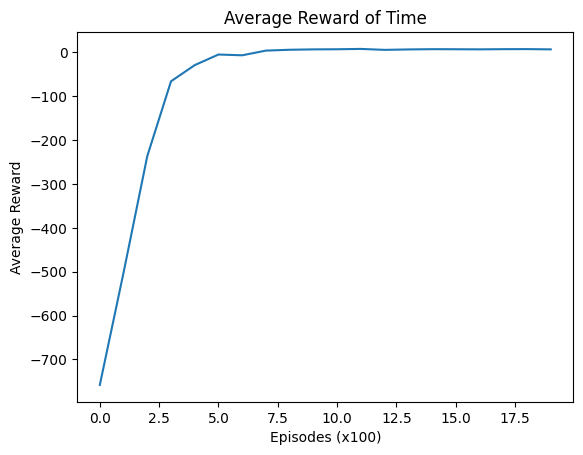

Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-2000.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\Double-DQN\rl-video-episode-2000.mp4


In [20]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from collections import deque
from gym.wrappers import RecordVideo

# Initialize environment
env = gym.make('Taxi-v3', render_mode="rgb_array")
env.action_space.seed(42)

# Initialize metrics
average_rewards = []
episode_lengths = []
success_rates = []
rewards = []

# Records a video every 200 episodes
env = RecordVideo(env, video_folder='prob4/3.prob4_output/Double-DQN', episode_trigger=lambda episode_id: episode_id % 200 == 0)

# Hyperparameters
alpha = 0.001  # Learning rate for the neural network
gamma = 0.99 # Discount factor
epsilon = 0.9  # Initial exploration rate
epsilon_min = 0.01 # Minimal exploration rate after decay
epsilon_decay = 0.99 # Decay rate
episodes = 2000 # Amount of episodes
batch_size = 128 # Batch size for the neural network
memory_size = 20000 # Memory size for the neural network

# DQN Model - is responsible for creating the NN and doing the forward pass
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64) # Input layer
        self.fc2 = nn.Linear(64, 64) # Hidden layer
        self.fc3 = nn.Linear(64, output_dim) # Output layer

    def forward(self, x): # Forward pass
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initializing Q-network and target network
n_states = env.observation_space.n # Retrieves the total number of possible states
n_actions = env.action_space.n # Retrieves the total number of possible actions
q_network = DQN(n_states, n_actions) # using the DQN class created earlier it creates a q-table for the state and action pairs
target_network = DQN(n_states, n_actions) 
target_network.load_state_dict(q_network.state_dict())
target_network.eval()

# Adam is a method for stochastic optimization
optimizer = optim.Adam(q_network.parameters(), lr=alpha) # Defines the optimizer used when tuning the network
memory = deque(maxlen=memory_size) # Is used to keep track of earlier episodes, deque = double ended queue


# Used for translating categorical data into a binary vector 
def one_hot_encode(state, num_states):
    one_hot = np.zeros(num_states)
    one_hot[state] = 1
    return one_hot

# Experience replay using Double DQN 
def replay():
    if len(memory) < batch_size: # Checks if there is a batch that can be used for training available
        return

    batch = random.sample(memory, batch_size) # Batches are collections of previously collected experiences
    states, actions, rewards, next_states, dones = zip(*batch) # Take a batch from the memory and unzip it

    # Training
    # Converting to the tensor datatype the NN requires
    states = torch.tensor(np.array([one_hot_encode(s, n_states) for s in states]), dtype=torch.float32)
    actions = torch.tensor(actions, dtype=torch.int64).unsqueeze(1)
    rewards = torch.tensor(rewards, dtype=torch.float32)
    next_states = torch.tensor(np.array([one_hot_encode(ns, n_states) for ns in next_states]), dtype=torch.float32)
    dones = torch.tensor(dones, dtype=torch.float32)

    # Q-value prediction for the selected actions
    q_values = q_network(states).gather(1, actions).squeeze()

    # Double DQN target calculation
    with torch.no_grad():
        # Use q_network to select the best action for each next state
        next_actions = q_network(next_states).argmax(dim=1, keepdim=True)
        # Use target_network to evaluate the Q-value of those actions
        next_q_values = target_network(next_states).gather(1, next_actions).squeeze()
        target_q_values = rewards + (gamma * next_q_values * (1 - dones))

    # Loss and optimization step
    loss = nn.functional.mse_loss(q_values, target_q_values.detach())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Training loop
for episode in range(episodes):
    state, info = env.reset() # Makes sure we got a clean environment

    # Initializing variables
    total_reward = 0 
    steps = 0
    done = False
    
    # Looping through the episodes
    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample() # Selects a random action from the possible actions
        else:
            state_tensor = torch.tensor(one_hot_encode(state, n_states), dtype=torch.float32) # Converts state to encoded tensor that the network can process 
            with torch.no_grad(): # Not using gradient tracking for efficiency
                q_values = q_network(state_tensor) # Get Q-value for each state
                action = torch.argmax(q_values).item() # Select the highest Q-value action
        
        next_state, reward, terminated, truncated, info = env.step(action) # Apply the chosen action to the environment and extract the value of the variables
        done = terminated or truncated

        # For metrics
        steps += 1 
        total_reward += reward
        
        memory.append((state, action, reward, next_state, done)) # Adding the experience into memory which can be used to train the network
        state = next_state # Updating the state
        
        replay() # Calling the replay function to train the network
        
    # Update target network periodically
    # For Double DQN so we can avoid introducing new errors
    if episode % 10 == 0:
        target_network.load_state_dict(q_network.state_dict())
    
    # Controlling the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    
    # Tracking metrics
    rewards.append(total_reward)
    episode_lengths.append(steps)
    success = 1 if done and terminated else 0
    success_rates.append(success)
    avg_success_rate = np.mean(success_rates) * 100

    if episode % 100 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_length = np.mean(episode_lengths[-100:])
        

        average_rewards.append(avg_reward)
        print(f'Episode {episode}, Total Reward: {total_reward}')
        
print(f'Average reward: {avg_reward}')
print(f'Average length: {avg_length}')
print(f'Average success rate: {avg_success_rate}%')

# Plotting the total reward
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()

# Plotting the average reward
plt.plot(average_rewards)
plt.xlabel('Episodes (x100)')
plt.ylabel('Average Reward')
plt.title('Average Reward of Time')
plt.show()

env.close()


Sarsa

Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-0.mp4
Episode 0, Total Reward: -830
Episode 100, Total Reward: -289
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-200.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-200.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-200.mp4
Episode 200, Total Reward: -425
Episode 300, Total Reward: -272
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-400.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-400.mp4



Moviepy - Done !


Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-400.mp4
Episode 400, Total Reward: -58
Episode 500, Total Reward: -7
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-600.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-600.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-600.mp4
Episode 600, Total Reward: 1
Episode 700, Total Reward: 8
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-800.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-800.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-800.mp4
Episode 800, Total Reward: 4
Episode 900, Total Reward: 0
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1000.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1000.mp4
Episode 1000, Total Reward: 2
Episode 1100, Total Reward: 9
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1200.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1200.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1200.mp4
Episode 1200, Total Reward: 5
Episode 1300, Total Reward: 0
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1400.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1400.mp4



Moviepy - Done !


Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1400.mp4
Episode 1400, Total Reward: 9
Episode 1500, Total Reward: 6
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1600.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1600.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1600.mp4


Episode 1600, Total Reward: 9
Episode 1700, Total Reward: 11
Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1800.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1800.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-1800.mp4
Episode 1800, Total Reward: 6
Episode 1900, Total Reward: 9
Average reward: 7.68
Average length: 13.14
Average success rate: 91.7%


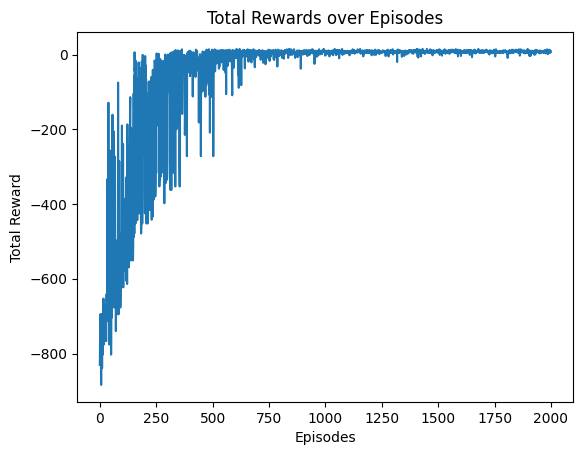

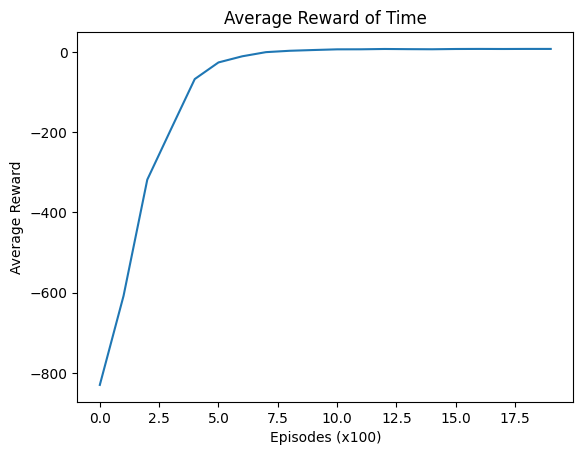

Moviepy - Building video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-2000.mp4.
Moviepy - Writing video c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\jonas\Documents\GitHub\Evolutionary-AI_gruppe_gruppe9\prob4\2.prob4_kode\prob4\3.prob4_output\SARSA\rl-video-episode-2000.mp4


In [21]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.wrappers import RecordVideo

# Initialize environment
env = gym.make('Taxi-v3', render_mode="rgb_array") # , render_mode="human"
env.action_space.seed(42)

# Initialize metrics
average_rewards = []
episode_lengths = []
success_rates = []
rewards = []

# Records a video every 200 episodes
env = RecordVideo(env, video_folder='prob4/3.prob4_output/SARSA', episode_trigger=lambda episode_id: episode_id % 200 == 0)

# Hyperparameters
alpha = 0.25 # Learning rate
gamma = 0.99 # Discount factor
epsilon = 1 # Initial exploration rate
epsilon_min = 0.01 # Minimal exploration rate after decay
epsilon_decay = 0.995 # Decay rate
episodes = 2000 # Amount of episodes

# Q-table init
n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))

# Training loop
for episode in range(episodes):
    observation, info = env.reset() # Make sure environment is reset before every run
    
    # Initializing variables
    total_reward = 0
    steps = 0
    success = 0
    done = False

    # Initial action
    action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(q_table[observation])

    while not done:
        next_observation, reward, terminated, truncated, info = env.step(action)
        next_action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(q_table[next_observation])
        
        # Updating the Q-table (state is observation)
        q_table[observation, action] = q_table[observation, action] + \
            alpha * (reward + gamma * q_table[next_observation, next_action] - q_table[observation, action])
        
        # Update state
        observation, action = next_observation, next_action

        # For metrics
        steps += 1 
        total_reward += reward

        done = terminated or truncated

        if terminated:
            success = 1
        
    # Controlling the exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Tracking metrics
    rewards.append(total_reward)
    episode_lengths.append(steps)
    success_rates.append(success)
    avg_success_rate = np.mean(success_rates) * 100

    if episode % 100 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_length = np.mean(episode_lengths[-100:])
        

        average_rewards.append(avg_reward)
        print(f'Episode {episode}, Total Reward: {total_reward}')
        
print(f'Average reward: {avg_reward}')
print(f'Average length: {avg_length}')
print(f'Average success rate: {avg_success_rate}%')
        
# Plotting the total reward
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()

# Plotting the average reward
plt.plot(average_rewards)
plt.xlabel('Episodes (x100)')
plt.ylabel('Average Reward')
plt.title('Average Reward of Time')
plt.show()

env.close()